In [108]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

from preprocessing_utils import *
from statsmodels.graphics.tsaplots import plot_acf

In [2]:
# Parameters
start="1998-01-01"
end="2007-12-31"

path = "C:\Google Drive (mg963)\PhD\data\pickle\df_stations_all_nonzero_extended.pkl"

In [4]:
st = (import_dataframe(path) # Import dataframe
    .pipe(drop_df_NaNs, series='Prec') # Drop NaNs
    .pipe(clip_time_period, start, end) # Clip data temporally 
)

Length of imported dataframe: 364772
Length of dataframe after dropping NaNs: 364771
Length of clipped dataframe: 196997


In [5]:
# savepath = "C:\Google Drive (mg963)\PhD\data\pickle\df_stations_all_nonzero_extended_filetered.pkl"
# st.to_pickle(savepath)

In [21]:
station = st['Station'].unique()[3]
st_station = st[st['Station']==station]

[]

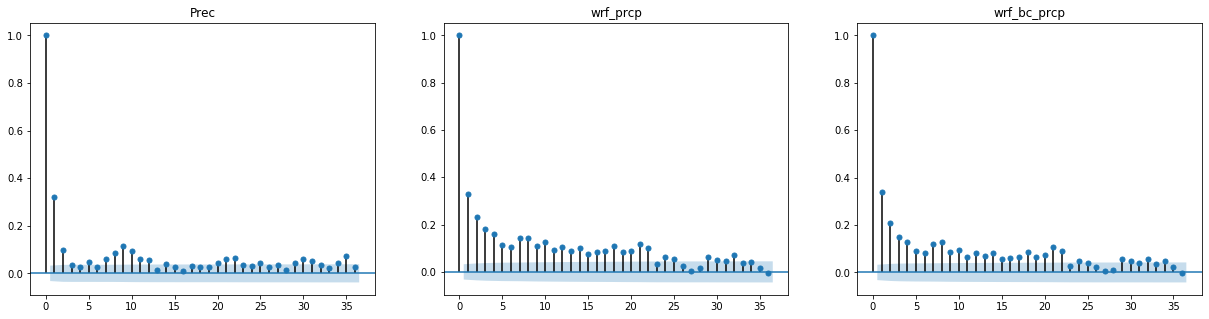

In [56]:
col = ['Prec','wrf_prcp','wrf_bc_prcp']
fig, axes = plt.subplots(1, len(col), figsize=(7*len(col),5))
for index, ax in enumerate(axes.flatten()):
    plot_acf(st_station[col[index]],ax=ax,use_vlines=True)
    ax.set_title(col[index])
plt.plot()

In [1]:
cols = ['Prec','wrf_prcp','wrf_bc_prcp']
fig = plt.figure(figsize=(5,5))
ax = plt.gca()
for col in cols:
    plot_acf(st_station[col],ax=ax,use_vlines=False,alpha=1,zero=False)
    plt.legend(cols)

NameError: name 'plt' is not defined

### WIP

In [96]:
val_stations = [
    "Jhanduta'",
    "Baldwara'",
    "Badsar'",
    "Dharamshalla Obs'",
    "Jaswan Kotla'",
    "Shahpur'",
    "Bangana'"
]

PATH = r'C:\Google Drive (mg963)\PhD\data\SUSHIWAT\obs\all-imd-bbmb_1998_2007_useful_rain_MGM.xls'
x = pd.read_excel(PATH, header=1).drop(labels=range(9),axis=0).set_index('date').loc['1998-01-01':'2007-12-31']

In [98]:
val_stations = [
    "Jhanduta'",
    "Baldwara'",
    "Badsar'",
    "Dharamshalla Obs'",
    "Jaswan Kotla'",
    "Shahpur'",
    "Bangana'"
]

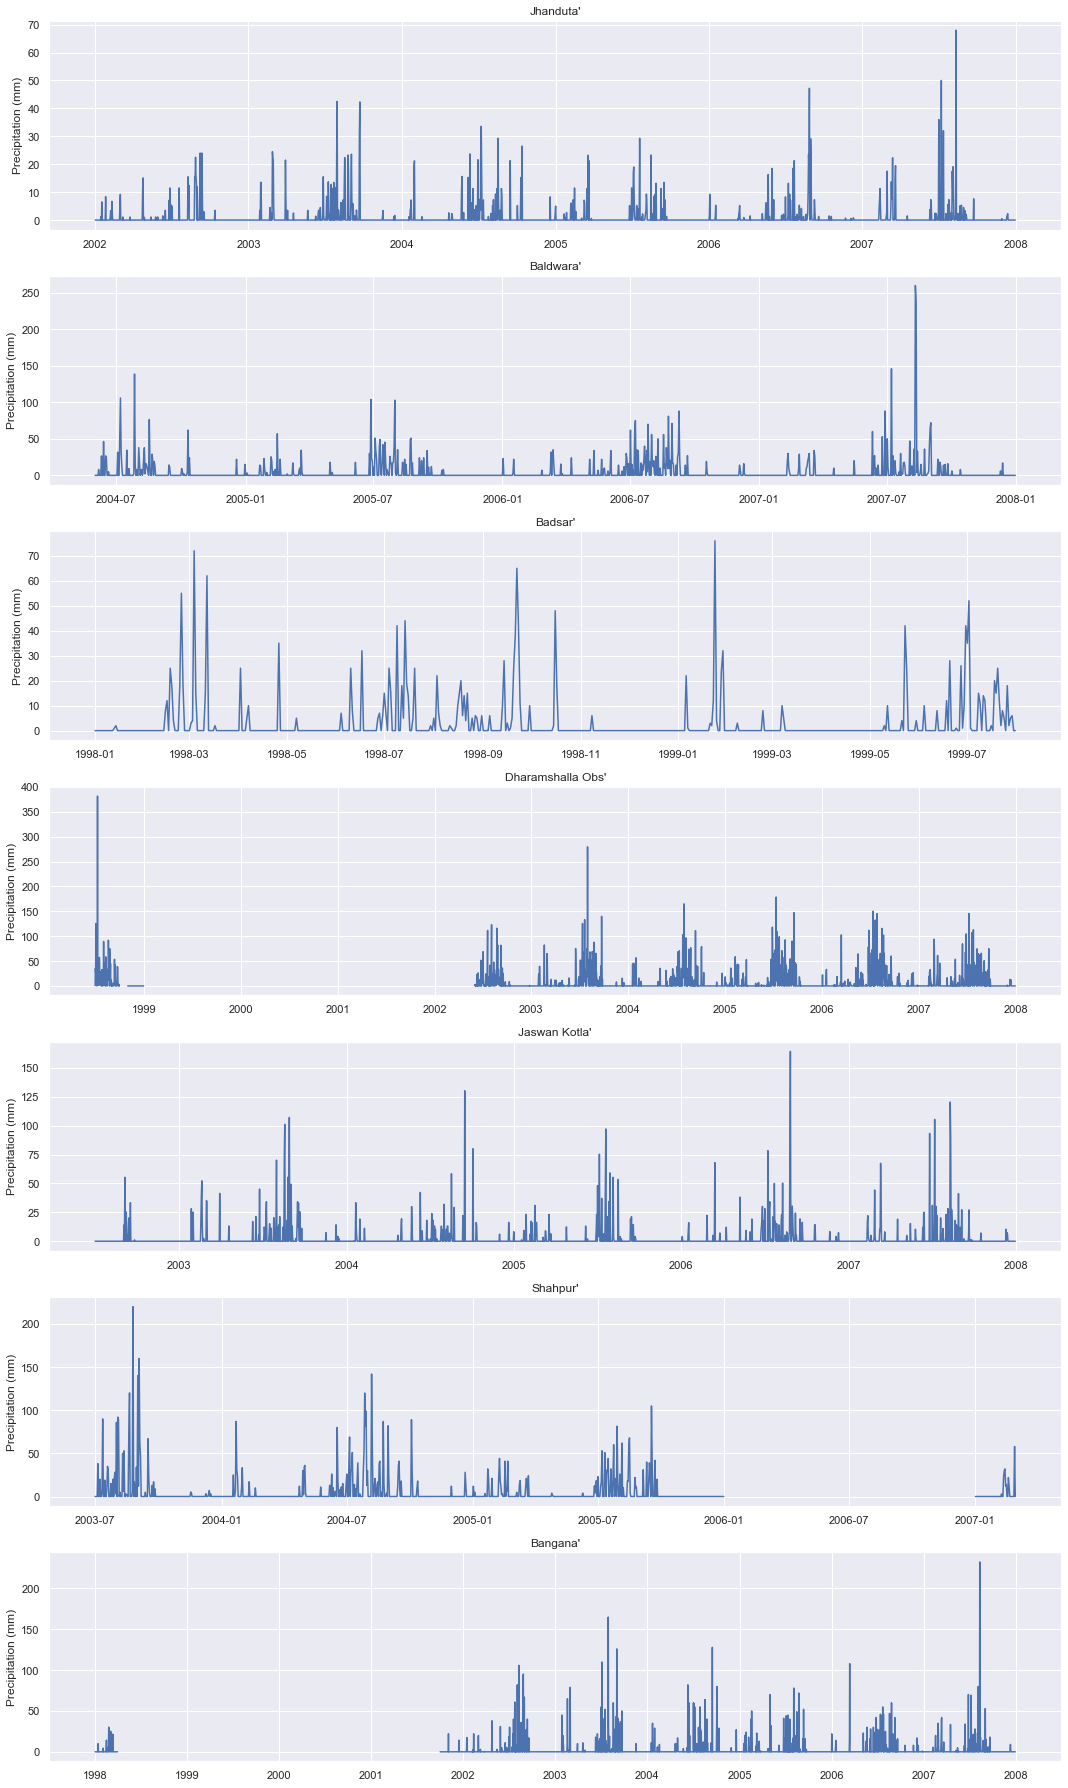

In [120]:
fig, axes = plt.subplots(7,1, figsize=(15,25))
for index, ax in enumerate(axes.flatten()):
    ax.plot(x[val_stations[index]])
    ax.set_title(val_stations[index])
    ax.set_ylabel("Precipitation (mm)")
plt.tight_layout()
plt.show()

In [119]:
sns.set_theme()

In [122]:
pickle_path = '..\..\PhD/data/pickle/df__validation_stations.pkl'
x[val_stations].to_pickle(pickle_path)